In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Exploring Data


In [2]:
df = pd.read_csv("Downloads/train.csv")
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
df.drop('Unnamed: 0', axis = 1,inplace = True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.dropna(subset = ['Arrival Delay in Minutes'], inplace = True)

In [7]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [8]:
df.duplicated().any()

False

# Data Visualization

## Univariate Analysis

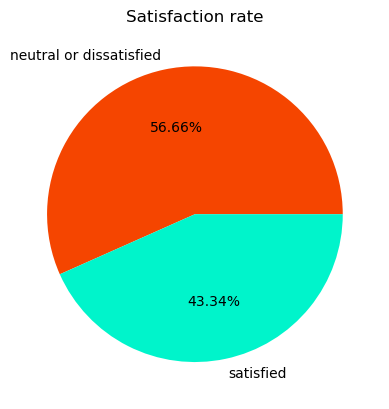

In [9]:
satis = df['satisfaction'].value_counts()
plt.pie(satis, 
        labels = satis.index, 
        autopct='%1.2f%%',
       colors = ['#F54500' , '#00F4CB'])
plt.title("Satisfaction rate")
plt.show()

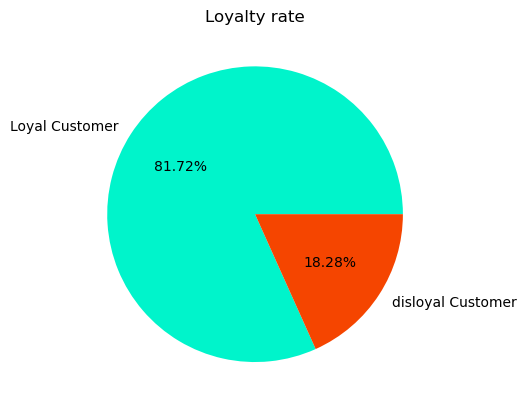

In [10]:
custo_type = df['Customer Type'].value_counts()
plt.pie(custo_type, 
        labels = custo_type.index, 
        autopct='%1.2f%%',
       colors = ['#00F4CB' , '#F54500'])
plt.title("Loyalty rate")
plt.show()

## Bivariate analysis


Text(0.5, 1.0, 'Count of Satisfaction by Travel Class')

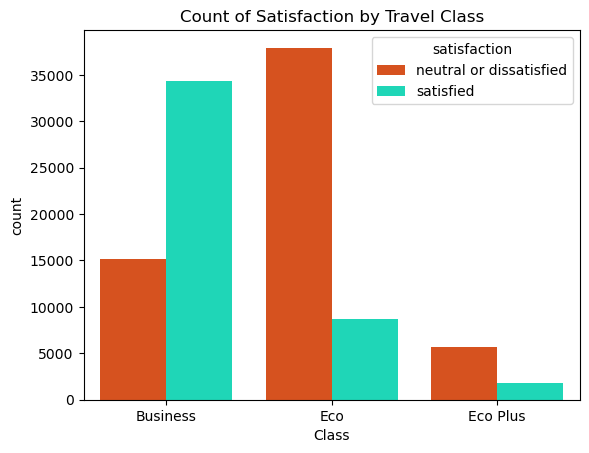

In [11]:
custom_palette = {'neutral or dissatisfied': '#F54500', 'satisfied': '#00F4CB'}

sns.countplot(data = df, 
              x='Class', 
              hue = 'satisfaction',
             order = ["Business", "Eco" , "Eco Plus"],
             palette = custom_palette)
plt.title("Count of Satisfaction by Travel Class")

Text(0.5, 1.0, 'Count of Satisfaction by Customer Type')

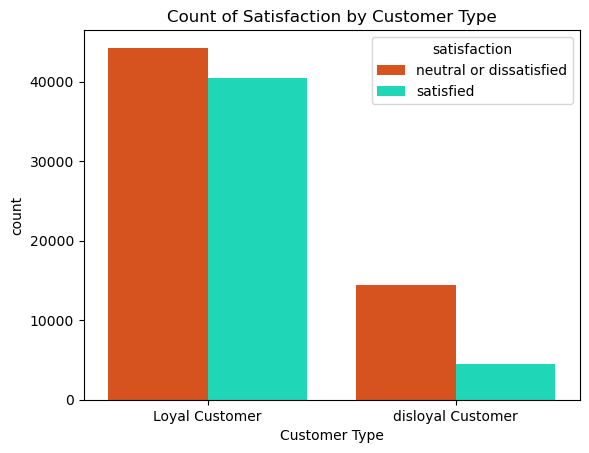

In [12]:
sns.countplot(data = df, 
              x='Customer Type', 
              hue = 'satisfaction',
             order = ["Loyal Customer" , "disloyal Customer"],
             palette = custom_palette)
plt.title("Count of Satisfaction by Customer Type")

Text(0.5, 1.0, 'Choice of Class by Customer Type')

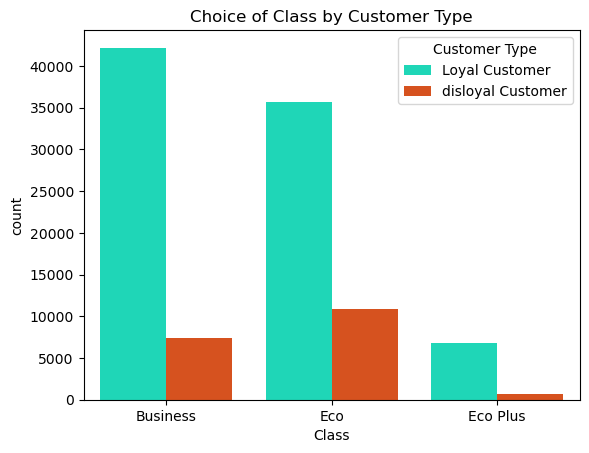

In [13]:
customer = {'disloyal Customer': '#F54500', 'Loyal Customer': '#00F4CB'}

sns.countplot(data = df, 
              x='Class', 
              hue = 'Customer Type',
             order = ["Business", "Eco" , "Eco Plus"],
             palette = customer)
plt.title("Choice of Class by Customer Type")

Text(0.5, 1.0, 'Count of Satisfaction by Gender')

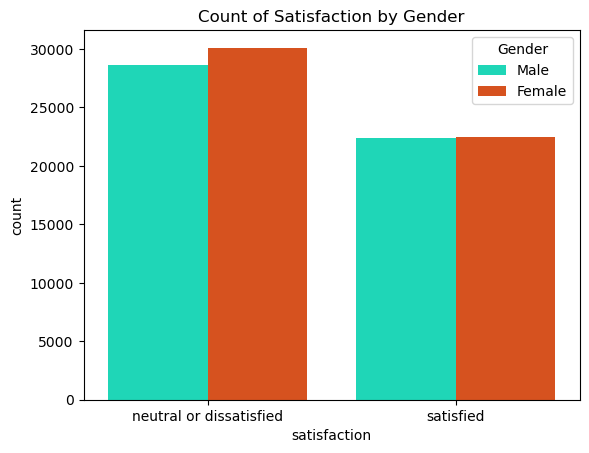

In [14]:
gender = {'Female': '#F54500', 'Male': '#00F4CB'}

sns.countplot(x='satisfaction',
               data = df, 
               hue = 'Gender',
             palette = gender)
plt.title('Count of Satisfaction by Gender')

Text(0.5, 1.0, 'Flight Distance by Class Type')

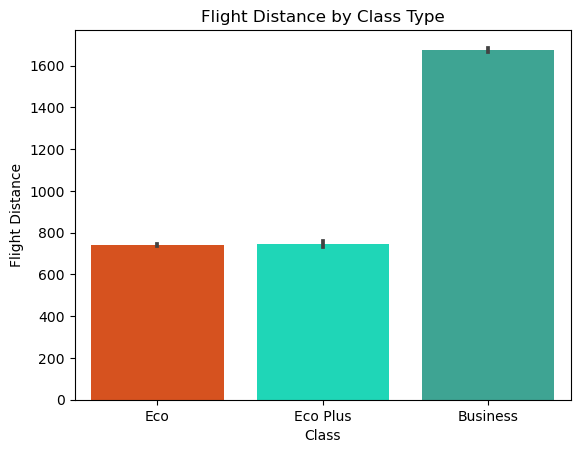

In [15]:
sns.barplot(data = df,
           x = "Class",
           y = "Flight Distance",
           order=['Eco','Eco Plus','Business'],
           palette = ['#F54500' , '#00F4CB' , '#2DB59E'])
plt.title("Flight Distance by Class Type")

Text(0.5, 1.0, 'Gender by Class Type')

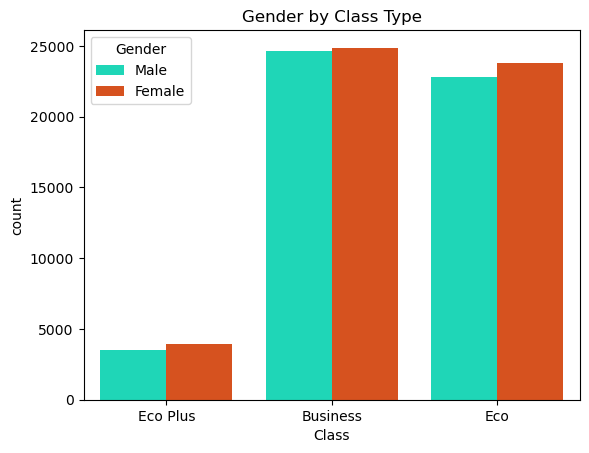

In [16]:
sns.countplot(data = df,
             x = "Class",
             hue = "Gender",
             palette = gender)
plt.title("Gender by Class Type")

<Axes: xlabel='Type of Travel', ylabel='count'>

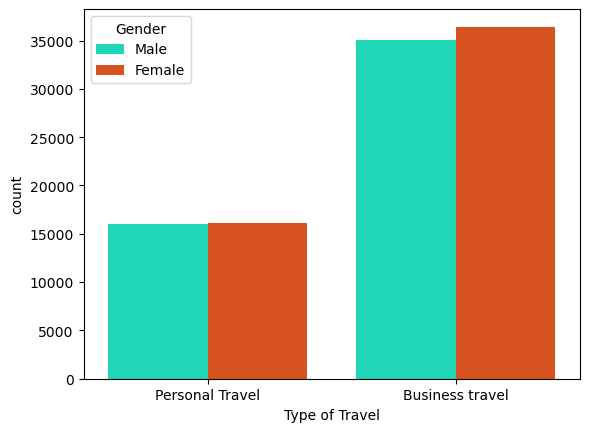

In [17]:
sns.countplot(data = df,
             x = "Type of Travel",
             hue = "Gender",
             palette = gender)

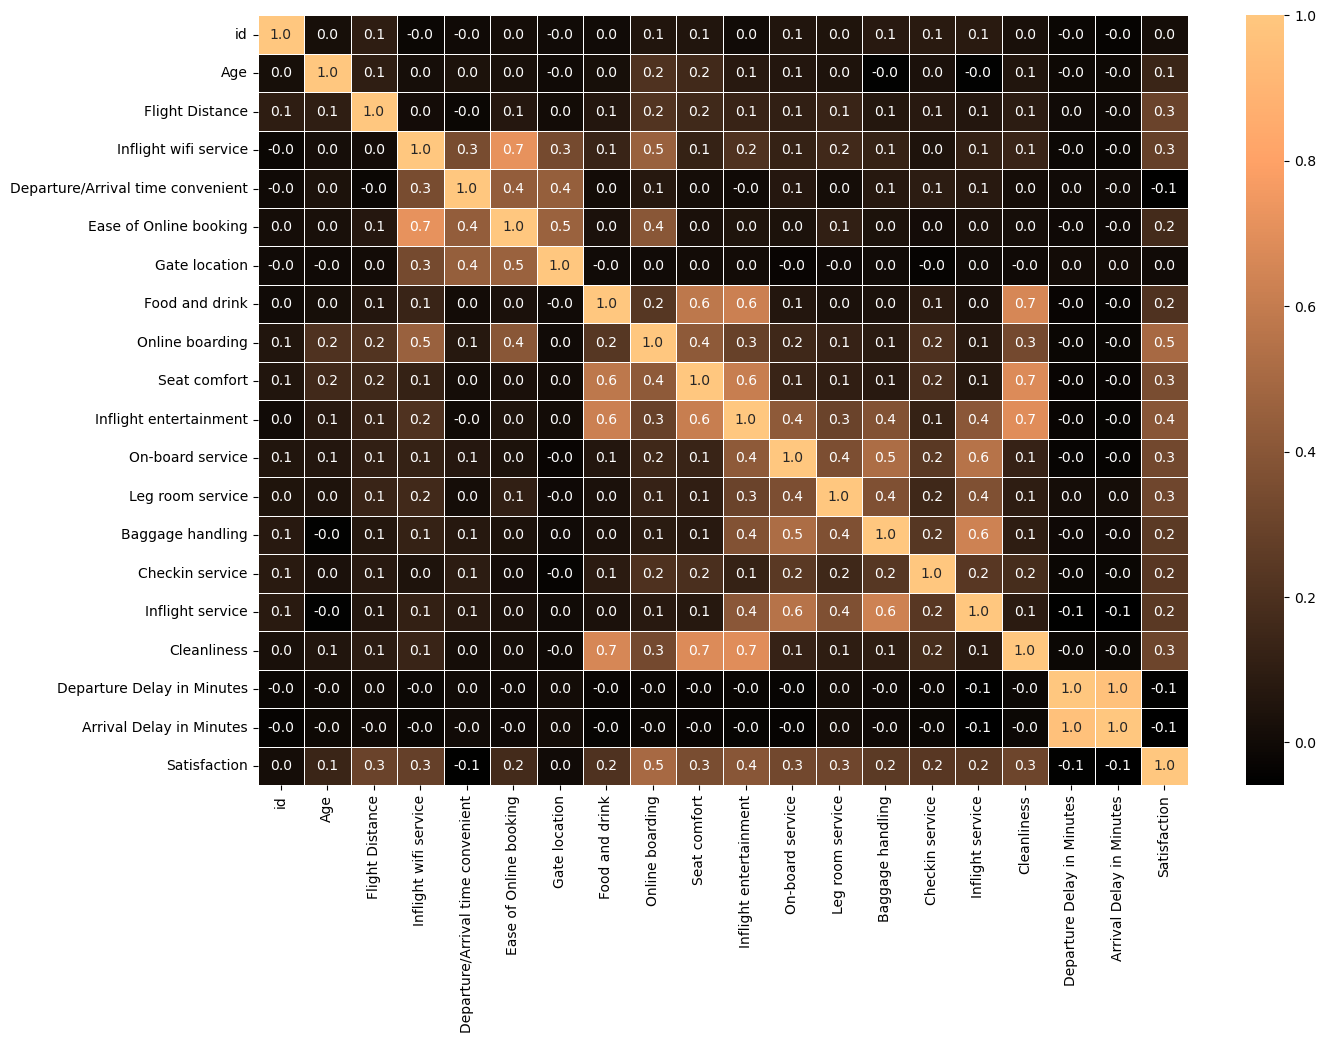

In [18]:
dfcopy = df.copy()
dfcopy['Satisfaction'] = dfcopy['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
corre = dfcopy._get_numeric_data().corr()
plt.figure(figsize = (15,10))
sns.heatmap(corre, annot=True, cmap='copper', linewidths = .6, fmt = ".1f")
plt.show()

# Insights 

### 1- The percentage of loyal customers is 81.72%, while the disloyal customers is 18.28%.
### 2- The percentage of satisfied customers is 43.34%, while the dissatisfied is 56.66%
### 3- Customers with loyalty or disloyalty had a large proportion of Dissatisfaction
### 4- The most satisfied and loyal customers used Business class, while the most dissatisfied and disloyal customers used Eco class
### 5- Female are the most dissatisfied
### 6- Males and Females prefer to used Busniess and Eco class
### 7- Males and Females traveled for Business purpose
### 8- Most customers prefer Business class for long distance flight
### 9- Gate location has the weakest relationship to satisfaction
### 10 - Ratings of ease of online booking and inflight wifi service are two of the most strongly correlated
### 11- Cleanliness ratings have a relatively strong positive correlation with food and drink, seat comfort, and inflight entertainment ratings
### 12 - Baggage handling and inflight service have a relatively strong positive relationship